In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
df=pd.read_csv("Balaji Fast Food Sales.csv")
print(df)

     order_id        date        item_name  item_type  item_price  quantity  \
0           1  07-03-2022         Aalopuri   Fastfood          20        13   
1           2   8/23/2022          Vadapav   Fastfood          20        15   
2           3  11/20/2022          Vadapav   Fastfood          20         1   
3           4  02-03-2023  Sugarcane juice  Beverages          25         6   
4           5  10-02-2022  Sugarcane juice  Beverages          25         8   
..        ...         ...              ...        ...         ...       ...   
994       996   3/19/2023          Frankie   Fastfood          50        10   
995       997   9/20/2022         Sandwich   Fastfood          60         7   
996       998   1/26/2023         Sandwich   Fastfood          60        13   
997       999   8/27/2022         Panipuri   Fastfood          20         5   
998      1000   5/29/2022         Aalopuri   Fastfood          20         3   

     transaction_amount transaction_type received_b

In [2]:
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,Online,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [3]:
df.tail()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
994,996,3/19/2023,Frankie,Fastfood,50,10,500,Online,Mrs.,Evening
995,997,9/20/2022,Sandwich,Fastfood,60,7,420,Online,Mr.,Evening
996,998,1/26/2023,Sandwich,Fastfood,60,13,780,Online,Mr.,Evening
997,999,8/27/2022,Panipuri,Fastfood,20,5,100,Online,Mrs.,Afternoon
998,1000,5/29/2022,Aalopuri,Fastfood,20,3,60,Online,Mrs.,Midnight


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            999 non-null    int64 
 1   date                999 non-null    object
 2   item_name           999 non-null    object
 3   item_type           999 non-null    object
 4   item_price          999 non-null    int64 
 5   quantity            999 non-null    int64 
 6   transaction_amount  999 non-null    int64 
 7   transaction_type    999 non-null    object
 8   received_by         999 non-null    object
 9   time_of_sale        999 non-null    object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [5]:
df.isnull().sum()

order_id              0
date                  0
item_name             0
item_type             0
item_price            0
quantity              0
transaction_amount    0
transaction_type      0
received_by           0
time_of_sale          0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['date']=pd.to_datetime(df['date'],format='mixed')
df['date'].head()

0   2022-07-03
1   2022-08-23
2   2022-11-20
3   2023-02-03
4   2022-10-02
Name: date, dtype: datetime64[ns]

In [8]:
df['item_price']=pd.to_numeric(df['item_price'])
df['quantity']=pd.to_numeric(df['quantity'])
df['transaction_amount']=pd.to_numeric(df['transaction_amount'])

In [9]:
total_revenue=df['transaction_amount'].sum()
total_orders=df['order_id'].nunique()

In [10]:
print("Total Revenue :",total_revenue)
print("Total Orders :",total_orders)

Total Revenue : 275070
Total Orders : 999


In [11]:
print("Highest and Lowest Salary")
daily_sales=df.groupby('date')['transaction_amount'].sum()
print("Highest salary day:")
print(daily_sales.idxmax(),daily_sales.max())
print("Lowest salary day:")
print(daily_sales.idxmin(),daily_sales.min())

Highest and Lowest Salary
Highest salary day:
2023-03-19 00:00:00 3350
Lowest salary day:
2022-09-23 00:00:00 20


In [12]:
print("Product Performance")
print("SUPER PERFORMING ITEMS")
top_items=df.groupby('item_name')['transaction_amount'].sum().sort_values(ascending=False).head(5)
print(top_items)

Product Performance
SUPER PERFORMING ITEMS
item_name
Sandwich           65820
Frankie            57500
Cold coffee        54440
Sugarcane juice    31950
Panipuri           24520
Name: transaction_amount, dtype: int64


In [13]:
print("UNDER PERFORMING ITEMS")
low_items=df.groupby('item_name')['transaction_amount'].sum().sort_values().head(5)
print(low_items)

UNDER PERFORMING ITEMS
item_name
Vadapav            19960
Aalopuri           20880
Panipuri           24520
Sugarcane juice    31950
Cold coffee        54440
Name: transaction_amount, dtype: int64


In [14]:
print("TIME BASED ANALYSIS")
time_sales=df.groupby('time_of_sale')['transaction_amount'].sum()
print(time_sales)

TIME BASED ANALYSIS
time_of_sale
Afternoon    56345
Evening      52355
Midnight     50725
Morning      53730
Night        61915
Name: transaction_amount, dtype: int64


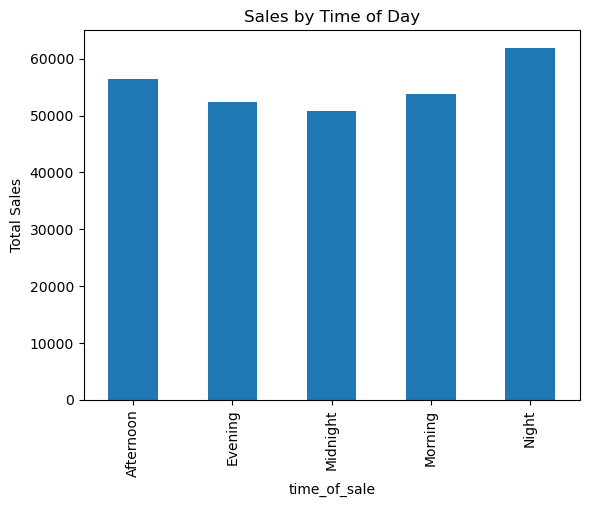

In [16]:
time_sales.plot(kind='bar',title='Sales by Time of Day')
plt.ylabel("Total Sales")
plt.show()

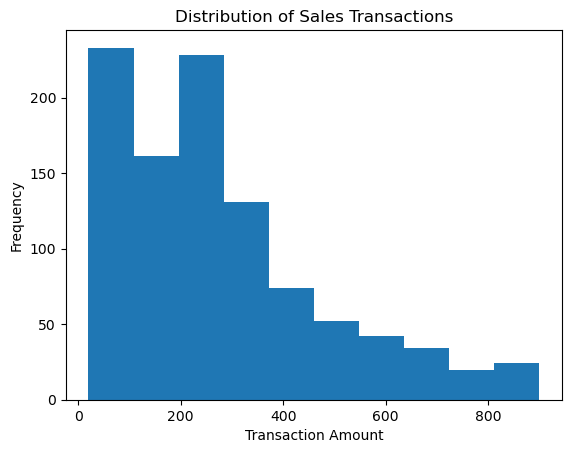

In [17]:
plt.hist(df['transaction_amount'], bins=10)
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Sales Transactions")
plt.show()

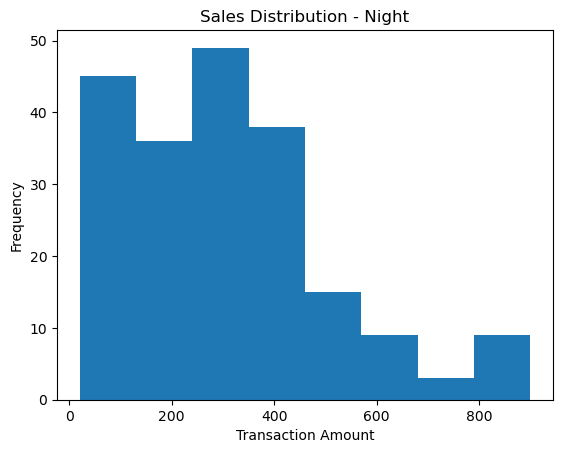

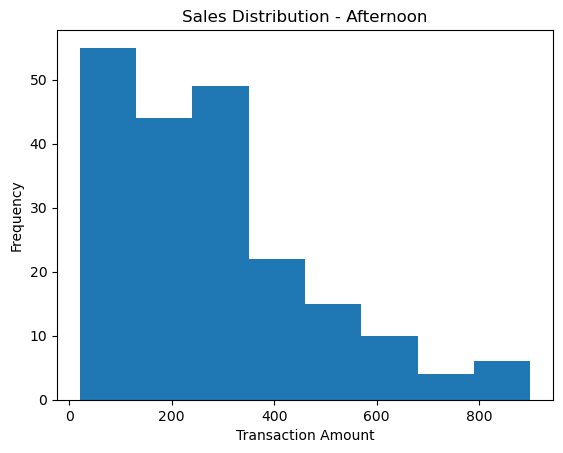

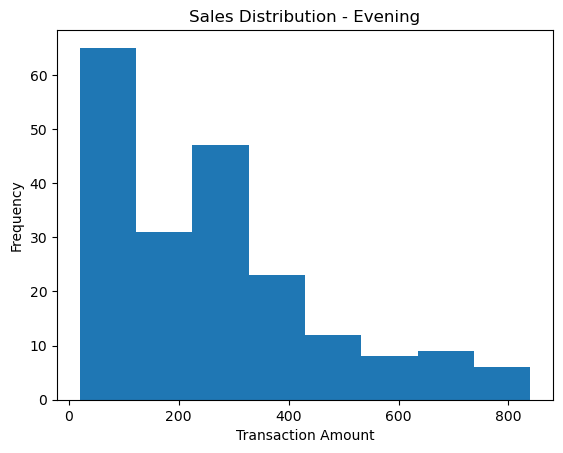

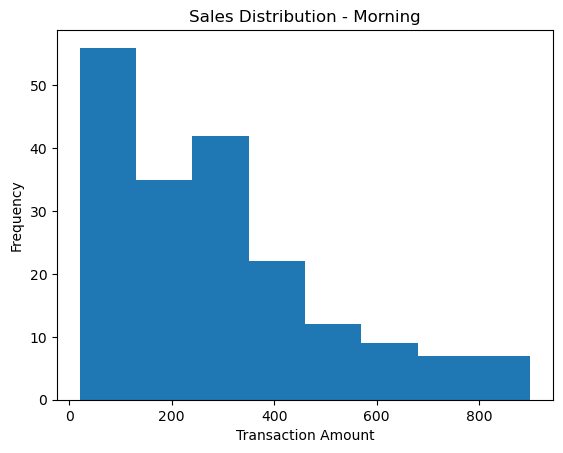

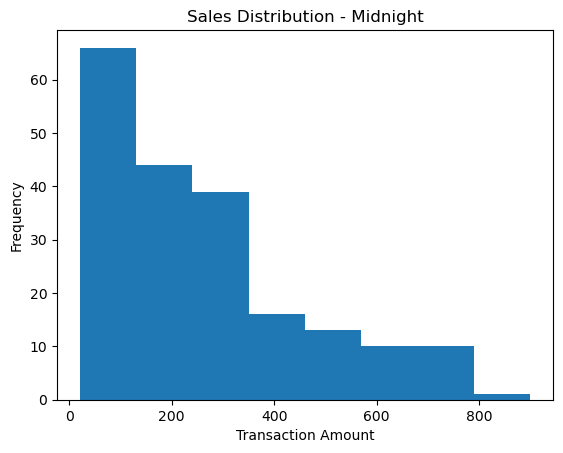

In [18]:
for period in df['time_of_sale'].unique():
    plt.figure()
    plt.hist(df[df['time_of_sale'] == period]['transaction_amount'], bins=8)
    plt.title(f"Sales Distribution - {period}")
    plt.xlabel("Transaction Amount")
    plt.ylabel("Frequency")
    plt.show()

In [19]:
print("PAYMENT AND OPERATIONS")
payment_dist=df['transaction_type'].value_counts()
payment_dist

PAYMENT AND OPERATIONS


transaction_type
Cash      532
Online    467
Name: count, dtype: int64

PAYMENT VISUALIZATION


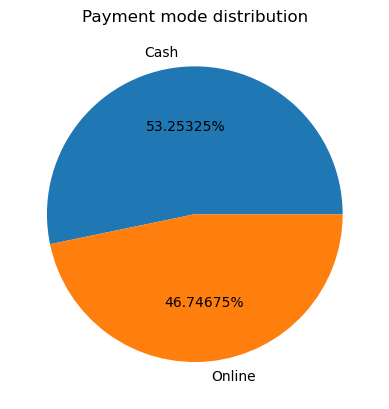

In [20]:
print("PAYMENT VISUALIZATION")
payment_dist.plot(kind='pie',autopct='%7.5f%%',title='Payment mode distribution')
plt.ylabel("")
plt.show()

TOP FIVE ITEMS VISUALIZATION


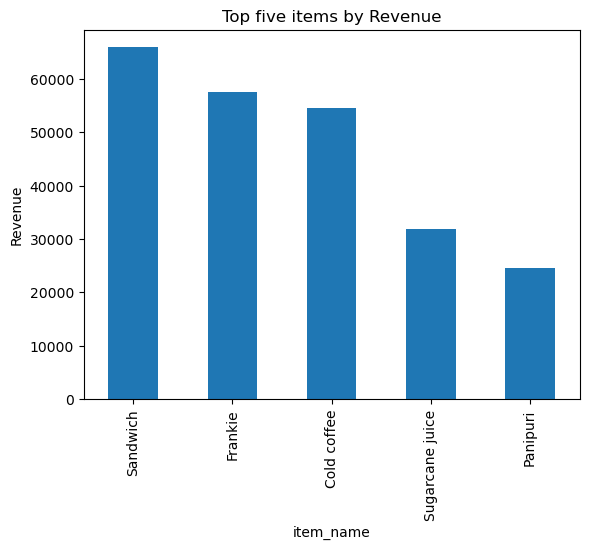

In [22]:
print("TOP FIVE ITEMS VISUALIZATION")
top_items.plot(kind='bar',title='Top five items by Revenue')
plt.ylabel("Revenue")
plt.show()

DAILY SALES TREND


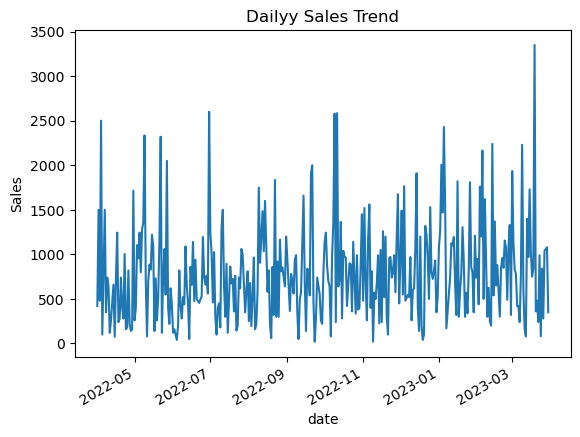

In [21]:
print("DAILY SALES TREND")
daily_sales.plot(kind='line',title='Dailyy Sales Trend')
plt.ylabel("Sales")
plt.show()